# Problem Statement

To build a loan Status predictor system that can predict whether the person is eligible for a loan or not by analysing various credintials of the person such as education, whether graduated or not, martial status and other such kinds of things. 

# Work Flow

1. Data Collection -> involves dataset consisting of differnrt variables to analyze whether to provide loan or not
2. EDA -> to understand the insights of the data, what is this data all about and other such kind of things
3. Feature Engineering -> involves some data cleaning & making data compatiable by data encoding
4. Data Splitting -> training data & test data
5. Model Building -> Building the model and evaluating on training data
6. Model Evaluation -> Evaluating on Test data
7. Comparison -> Comparing different models to choose the best model for classifying the loan status.

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection

In [2]:
data = pd.read_csv('Loan_Status.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA

**Missing Values**

In [6]:
# checking for missing values in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean()*100, 2),  ' % missing values')

Gender 2.12  % missing values
Married 0.49  % missing values
Dependents 2.44  % missing values
Self_Employed 5.21  % missing values
LoanAmount 3.58  % missing values
Loan_Amount_Term 2.28  % missing values
Credit_History 8.14  % missing values


**Handling the missing values**

In [8]:
# Replacing the missing values of continuous variables with mean/ median

data.LoanAmount.fillna(data.LoanAmount.mean(), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(), inplace=True)
data.Credit_History.fillna(data.Credit_History.median(), inplace=True)

In [9]:
# Replacing the missing values of categorical variables variables with mode

data.Gender.fillna(data.Gender.mode()[0], inplace=True)
data.Married.fillna(data.Married.mode()[0], inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0], inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace=True)

In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
data.shape

(614, 13)

In [12]:
# Statistical measures of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Numerical Variables**

In [13]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  5


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [14]:
# Numerical variables are usually of 2 type
# 1.Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(data[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [15]:
discrete_feature

['Loan_Amount_Term', 'Credit_History']

In [16]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

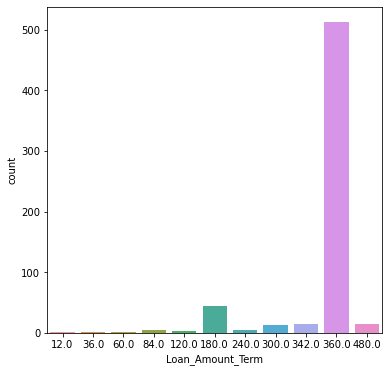

In [17]:
# distribution of Loan Amount term

plt.figure(figsize=(6,6))
sb.countplot(x='Loan_Amount_Term', data=data)
plt.show()

In [18]:
data.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

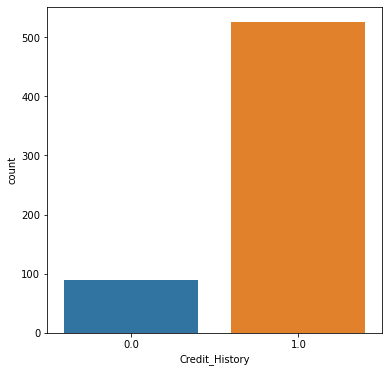

In [19]:
# distribution of Credit History

plt.figure(figsize=(6,6))
sb.countplot(x='Credit_History', data=data)
plt.show()

In [20]:
# 1.Continuous Variables

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [21]:
continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


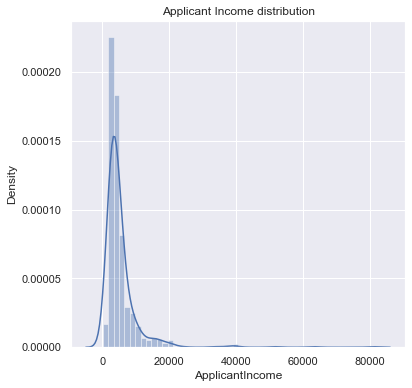

In [22]:
# distribution of Applicant Income 

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.ApplicantIncome)
plt.title('Applicant Income distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


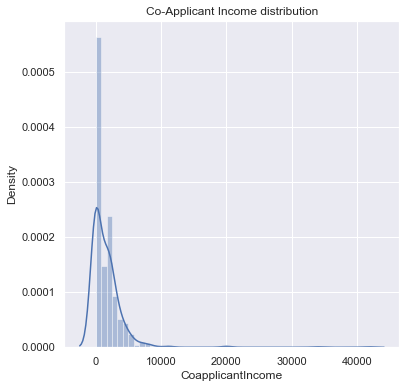

In [23]:
# distribution of Co-Applicant Income 

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.CoapplicantIncome)
plt.title('Co-Applicant Income distribution')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


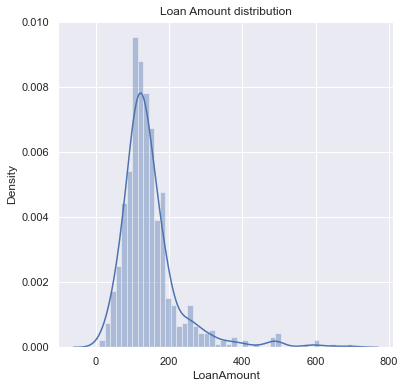

In [24]:
# distribution of Loan Amount

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.LoanAmount)
plt.title('Loan Amount distribution')
plt.show()

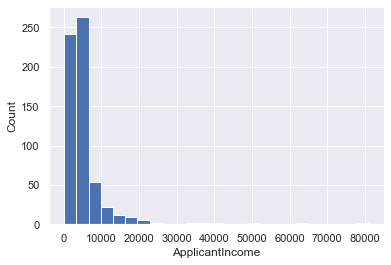

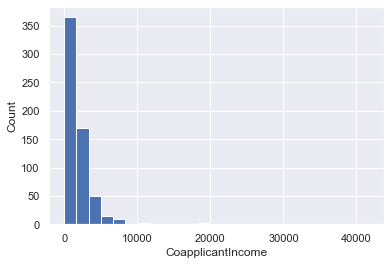

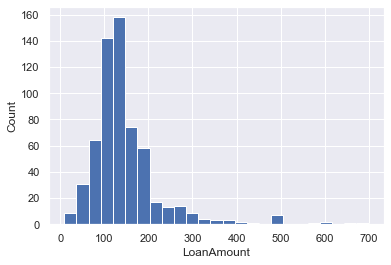

In [25]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df=data.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**Outliers**

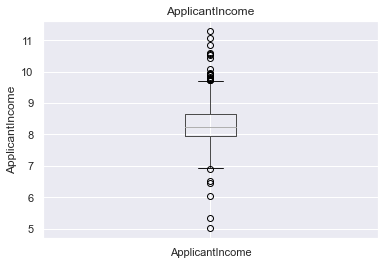

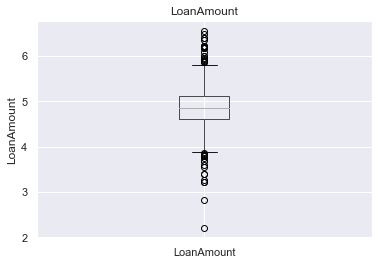

In [26]:
# only for continuous features
for feature in continuous_feature:
    df = data.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [27]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [28]:
data[categorical_features].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [29]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
Property_Area : 3
Loan_Status : 2


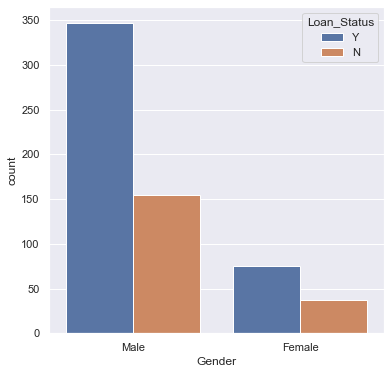

In [30]:
# distribution of Gender with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Gender', hue='Loan_Status', data=data)
plt.show()

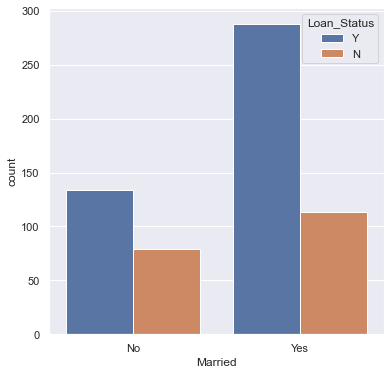

In [31]:
# distribution of Married with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Married', hue='Loan_Status', data=data)
plt.show()

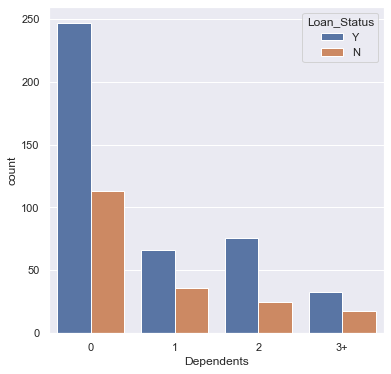

In [32]:
# distribution of Married with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Dependents', hue='Loan_Status', data=data)
plt.show()

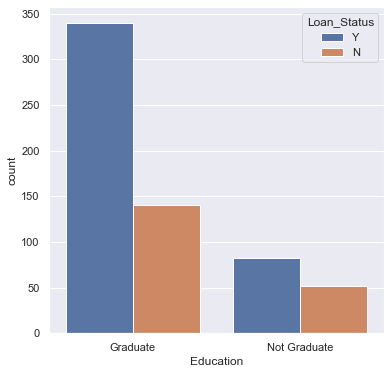

In [33]:
# distribution of Education with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Education', hue='Loan_Status', data=data)
plt.show()

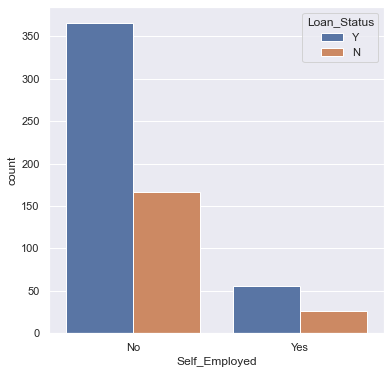

In [34]:
# distribution of Education with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Self_Employed', hue='Loan_Status', data=data)
plt.show()

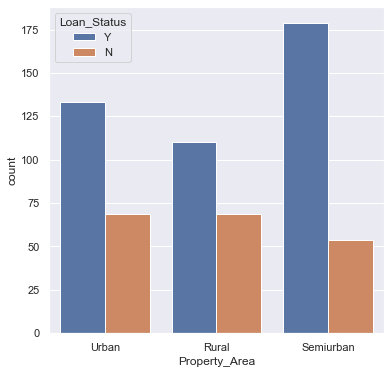

In [35]:
# distribution of Property area with respect to loan status
plt.figure(figsize=(6,6))
sb.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.show()

# Feature Engneering

**Encoding of Categorical Features**

In [36]:
# replacing the Loan status values of Y and N as 1 & 0 respectively
data.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)

In [37]:
# Dependebts column values
data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [38]:
# replacing the value of 3+ to 4
data.replace(to_replace='3+', value=4, inplace=True)

In [39]:
data.Dependents.value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [40]:
# convert the remaining categorical columns into numerical
data.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0}, 'Self_Employed':{'Yes':1,'No':0},
             'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [41]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


**Feature Selection**

In [42]:
x = data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = data.Loan_Status

In [43]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [44]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 52.9+ KB


In [46]:
x.Dependents = x.Dependents.astype('int64')

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


**Feature importance**

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier().fit(x,y)
model.feature_importances_

array([0.02101077, 0.02077458, 0.05978501, 0.02183502, 0.02143025,
       0.18105835, 0.11838313, 0.18091716, 0.04998771, 0.28032247,
       0.04449555])

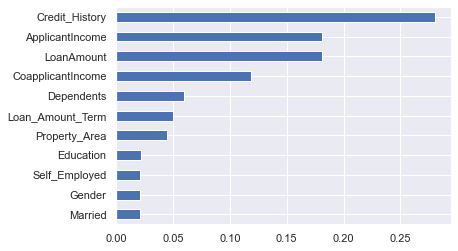

In [49]:
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.sort_values().plot(kind='barh')
plt.show()

**Correlation**

In [50]:
x.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170666,-0.101674,-0.047203,-0.012006
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.065243
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860
ApplicantIncome,0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500
CoapplicantIncome,0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522
LoanAmount,0.107930,0.147141,0.170666,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776
Loan_Amount_Term,-0.073567,-0.100863,-0.101674,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620
Credit_History,0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963


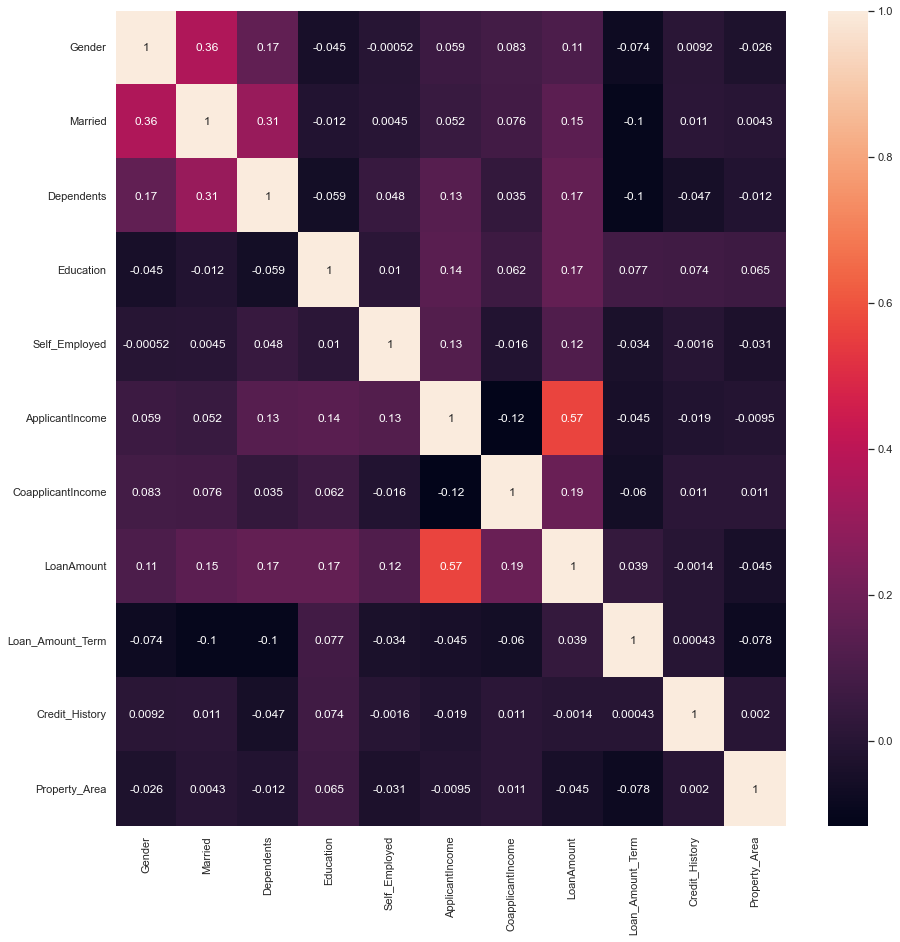

In [51]:
plt.figure(figsize=(15,15))
sb.heatmap(x.corr(), annot=True)
plt.show()

In [54]:
# lets remove the highly correlated features

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
correlation(x,0.7)

set()

As no multicollinearity exists, we will proceed further

# Data Splitting

In [57]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [58]:
print(x.shape, x_train.shape, x_test.shape)

(614, 11) (552, 11) (62, 11)


# Logistic Regression

**Model Building**

In [59]:
# loading the logistic regression model
from sklearn.linear_model import LogisticRegression

model_logistic_reg  = LogisticRegression().fit(x_train, y_train)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# accuracy of training data

x_train_log = model_logistic_reg.predict(x_train)
training_accuracy_log = accuracy_score(x_train_log, y_train)
training_accuracy_log

0.8061594202898551

**Model Evaluation**

Evaluation Metrics

- Accuracy Score – no. of correctly classified instances/total no. of instances
- Precision Score – the ratio of correctly predicted instances over total positive instances
- Recall Score – the ratio of correctly predicted instances over total instances in that class
- Roc Curve – a plot of true positive rate against false positive rate
- Confusion Matrix – a table used to describe the classification models

In [61]:
# accuracy of test data

x_test_log = model_logistic_reg.predict(x_test)
test_accuracy_log = accuracy_score(x_test_log, y_test)
test_accuracy_log

0.8225806451612904

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, x_test_log)

array([[ 5,  9],
       [ 2, 46]], dtype=int64)

In [63]:
# import accuracy_score, precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_log)))
print('Precision score: ', format(precision_score(y_test, x_test_log)))
print('Recall score: ', format(recall_score(y_test, x_test_log)))
print('F1 score: ', format(f1_score(y_test, x_test_log)))

Accuracy score:  0.8225806451612904
Precision score:  0.8363636363636363
Recall score:  0.9583333333333334
F1 score:  0.8932038834951457


**ROC curve**

In [64]:
# probability of the class using the predict_proba()
predictions_probability = model_logistic_reg.predict_proba(x_test)

from sklearn.metrics import roc_auc_score
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.6651785714285714


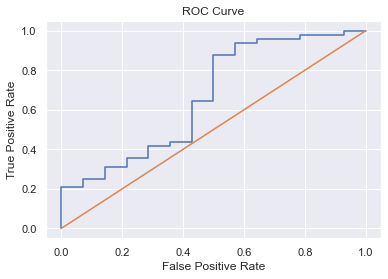

In [65]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Logistic Regression model performed good in classifying the loan status to provide loan or not, with an Accuracy score, Precision and Recall of approx **82%**. And the roc curve and confusion matrix are Ok as well, which means that Logistic Regression model is able to classify the labels accurately, with fewer chances of error.

# Decision Tree Classifier

**Model Building**

In [66]:
# importing the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
model_tree = DecisionTreeClassifier()

# fit the training data into the classifier
model_tree.fit(x_train, y_train)

pred_train_tree = model_tree.predict(x_train)
training_accuracy_tree = accuracy_score(pred_train_tree, y_train)
training_accuracy_tree

1.0

In [67]:
# optimizing model parameters
from sklearn.model_selection import GridSearchCV   

parameters = [{'criterion':['gini','entropy']}]
search = GridSearchCV(model_tree, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished


In [68]:
# optimum parameter values
search.best_params_

{'criterion': 'entropy'}

In [69]:
model_tree = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

In [70]:
# accuracy of training data

pred_train_tree = model_tree.predict(x_train)
training_accuracy_tree = accuracy_score(pred_train_tree, y_train)
training_accuracy_tree

1.0

**Model Evaluation**

In [71]:
# accuracy of test data

pred_test_tree = model_tree.predict(x_test)
test_accuracy_tree = accuracy_score(pred_test_tree, y_test)
test_accuracy_tree

0.5806451612903226

In [72]:
# confusion matrix
confusion_matrix(y_test, pred_test_tree)

array([[ 5,  9],
       [17, 31]], dtype=int64)

In [73]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_tree)))
print('Precision score: ', format(precision_score(y_test, pred_test_tree)))
print('Recall score: ', format(recall_score(y_test, pred_test_tree)))
print('F1 score: ', format(f1_score(y_test, pred_test_tree)))

Accuracy score:  0.5806451612903226
Precision score:  0.775
Recall score:  0.6458333333333334
F1 score:  0.7045454545454546


**ROC Curve**

In [74]:
# probability of the class using the predict_proba()
predictions_probability = model_tree.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.5014880952380953


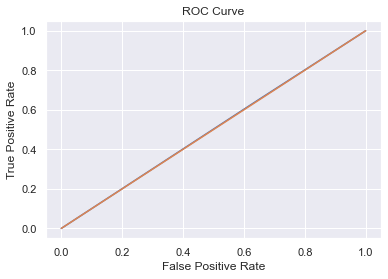

In [75]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Decision Tree Classifier model is not good in classifying the loan status to provide loan or not, with an Accuracy score, Precision and Recall of approx **58%**. And the roc curve and confusion matrix are also no good as well, which means that  Decision Tree model is able to classify only the 50% labels accurately.

# Random Forest

**Model Building**

In [76]:
# importing the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create the classifier
model_rf = RandomForestClassifier(n_estimators=500, max_features='sqrt')

# fit the training data into the classifier
model_rf.fit(x_train, y_train)

pred_train_rf = model_rf.predict(x_train)
training_accuracy_rf = accuracy_score(pred_train_rf, y_train)
training_accuracy_rf

1.0

In [77]:
# optimizing model parameters

parameters = [{'criterion':['gini','entropy'], 'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(model_rf, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.2s finished


In [78]:
# optimum parameter values
search.best_params_

{'criterion': 'gini', 'n_estimators': 400}

In [79]:
model_rf = RandomForestClassifier(criterion='gini', n_estimators=400, max_features='sqrt').fit(x_train, y_train)

In [80]:
# accuracy of training data

pred_train_rf = model_rf.predict(x_train)
training_accuracy_rf = accuracy_score(pred_train_rf, y_train)
training_accuracy_rf

1.0

**Model Evaluation**

In [81]:
# accuracy of test data

pred_test_rf = model_rf.predict(x_test)
test_accuracy_rf = accuracy_score(pred_test_rf, y_test)
test_accuracy_rf

0.7903225806451613

In [82]:
# confusion matrix
confusion_matrix(y_test, pred_test_rf)

array([[ 6,  8],
       [ 5, 43]], dtype=int64)

In [83]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_rf)))
print('Precision score: ', format(precision_score(y_test, pred_test_rf)))
print('Recall score: ', format(recall_score(y_test, pred_test_rf)))
print('F1 score: ', format(f1_score(y_test, pred_test_rf)))

Accuracy score:  0.7903225806451613
Precision score:  0.8431372549019608
Recall score:  0.8958333333333334
F1 score:  0.8686868686868686


**ROC Curve**

In [84]:
# probability of the class using the predict_proba()
predictions_probability = model_rf.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.7529761904761905


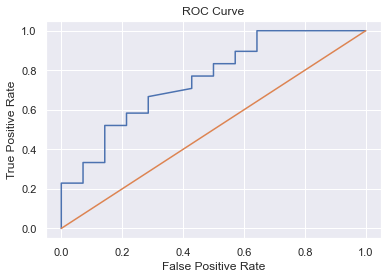

In [85]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Random Forest Classifier model performed good in classifying the loan status to provide loan or not, with an Accuracy score, Precision and Recall of approx **79%**. And the roc curve and confusion matrix are Ok as well, which means that Logistic Regression model is able to classify the labels accurately, with fewer chances of error.

# Bagging

**Model Building**

In [86]:
# Create the classifier
model_bag = RandomForestClassifier(n_estimators=500, max_features=None)

# fit the training data into the classifier
model_bag.fit(x_train, y_train)

pred_train_bag = model_bag.predict(x_train)
training_accuracy_bag = accuracy_score(pred_train_bag, y_train)
training_accuracy_bag

1.0

In [87]:
# optimizing model parameters

parameters = [{'criterion':['gini','entropy'], 'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(model_bag, parameters, scoring='accuracy', cv=5, verbose=True, n_jobs=-1).fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.7s finished


In [88]:
# optimum parameter values
search.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [89]:
model_bag = RandomForestClassifier(criterion='entropy', n_estimators=200, max_features=None).fit(x_train, y_train)

In [90]:
# accuracy of training data

pred_train_bag = model_bag.predict(x_train)
training_accuracy_bag = accuracy_score(pred_train_bag, y_train)
training_accuracy_bag

1.0

**Model Evaluation**

In [91]:
# accuracy of test data

pred_test_bag = model_bag.predict(x_test)
test_accuracy_bag = accuracy_score(pred_test_bag, y_test)
test_accuracy_bag

0.7580645161290323

In [92]:
# confusion matrix
confusion_matrix(y_test, pred_test_bag)

array([[ 6,  8],
       [ 7, 41]], dtype=int64)

In [93]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_bag)))
print('Precision score: ', format(precision_score(y_test, pred_test_bag)))
print('Recall score: ', format(recall_score(y_test, pred_test_bag)))
print('F1 score: ', format(f1_score(y_test, pred_test_bag)))

Accuracy score:  0.7580645161290323
Precision score:  0.8367346938775511
Recall score:  0.8541666666666666
F1 score:  0.845360824742268


**ROC Curve**

In [94]:
# probability of the class using the predict_proba()
predictions_probability = model_bag.predict_proba(x_test)
print("roc_auc_score: ",format(roc_auc_score(y_test, predictions_probability[:,1])))

roc_auc_score:  0.7574404761904762


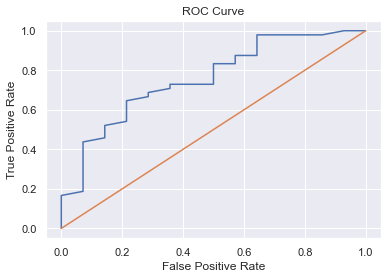

In [95]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Bagging model performed good in classifying the loan status to provide loan or not, with an Accuracy score, Precision and Recall of approx **76%**. And the roc curve and confusion matrix are Ok as well, which means that Bagging model is able to classify the labels accurately, with fewer chances of error.

# Comparison

Decreasing order of accuracy is depicted as:
- Logistic Regression - 0.8225
- Neural Networks - 0.8130
- Random Forest Classifier - 0.7903
- Bagging model - 0.7580
- Decision Tree Classifier - 0.5806

The results are highly clear that Logistic Regression model is best in predicting the loan status. Logistic Regression is the most accurate method because its ability to handle binary data. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.

# Making a predective System

In [96]:
# input data -> (Male,No,0,Graduate,No,2014,1929,74,360,1,Urban)
# output ->  Y=>1

input_data = (1, 0, 0, 1, 0, 2014, 1929, 74, 360, 1, 2)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [97]:
prediction = model_logistic_reg.predict(input_data_reshape)
print(prediction)

[1]


In [98]:
# input data -> (Male,Yes,2,Graduate,No,4400,0,127,360,0,Semiurban)
# output ->  N=>0

input_data = (1, 1, 2, 1, 0, 4400, 0, 127, 360, 0, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [99]:
prediction = model_logistic_reg.predict(input_data_reshape)
print(prediction)

[0]
